In [108]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Improve models performance and reduce scale problematic
# Reducing pixels value for models speed (using (x-u)/s) where x equal to images_pixels - average_of_images_pixels / difference_pixel_beetween_each_pixel
from sklearn.preprocessing import StandardScaler
import sys

# Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

images = images/255
images_test = images_test/255

images = images.reshape(10000, 28 ,28 ,1)
images_test = images_test.reshape(10000, 28 ,28 ,1)
print(targets.shape)

(10000,)


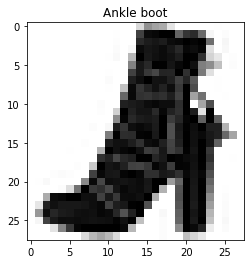

In [109]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

In [110]:
#Init model
model = Sequential()

# Add convolutionnal window operation layer
model.add(
    Conv2D(28, (3,3), padding='same', input_shape=(28, 28, 1))
)
# Delete negative values
model.add(Activation('relu'))

# Shrink image important shape
model.add(
    MaxPooling2D(pool_size=(2,2))
)

# Avoid overfitting
model.add(Dropout(0.25))


#CREATE ANN with convolutional and pooling output

#Create vector of pooling output result
model.add(Flatten())

#Create hidden layer
model.add(
    Dense(256)
)

# Activate neurones
model.add(Activation('relu'))
#Init output layer
model.add(
    Dense(10)
)

# Use softmax for probability distribution
model.add(Activation('softmax'))
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 28)        280       
_________________________________________________________________
activation_34 (Activation)   (None, 28, 28, 28)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 28)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 28)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 5488)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               1405184   
_________________________________________________________________
activation_35 (Activation)   (None, 256)             

In [111]:
# Init model parameters
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(lr=0.001),
    metrics=['accuracy'] 
)

history = model.fit(
    images,
    targets,
    batch_size=512,
    epochs=10,
    validation_split=0.4,
    shuffle=True,
    verbose=1
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/10
6000/6000 [==============================] - 1s 172us/step - loss: 1.1783 - accuracy: 0.5838 - val_loss: 0.7250 - val_accuracy: 0.7385
Epoch 2/10
6000/6000 [==============================] - 1s 145us/step - loss: 0.5995 - accuracy: 0.7908 - val_loss: 0.5454 - val_accuracy: 0.8018
Epoch 3/10
6000/6000 [==============================] - 1s 145us/step - loss: 0.4656 - accuracy: 0.8362 - val_loss: 0.4786 - val_accuracy: 0.8267
Epoch 4/10
6000/6000 [==============================] - 1s 145us/step - loss: 0.4095 - accuracy: 0.8585 - val_loss: 0.4369 - val_accuracy: 0.8380
Epoch 5/10
6000/6000 [==============================] - 1s 146us/step - loss: 0.3774 - accuracy: 0.8708 - val_loss: 0.4275 - val_accuracy: 0.8457
Epoch 6/10
6000/6000 [==============================] - 1s 143us/step - loss: 0.3570 - accuracy: 0.8785 - val_loss: 0.4011 - val_accuracy: 0.8608
Epoch 7/10
6000/6000 [==============================] - 1s 144us/step - loss

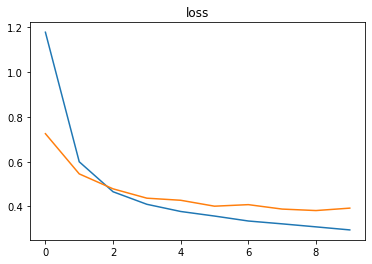

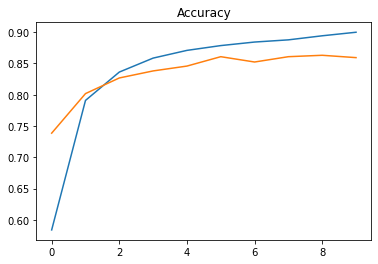

In [112]:
loss_curve = history.history['loss']
acc_curve = history.history['accuracy']


val_loss_curve = history.history['val_loss']
val_acc_curve = history.history['val_accuracy']

plt.plot(loss_curve)
plt.plot(val_loss_curve)
plt.title('loss')
plt.show()

plt.plot(acc_curve)
plt.plot(val_acc_curve)
plt.title('Accuracy')
plt.show()

In [113]:
model.evaluate(images_test, targets_test)

10000/10000 [==============================] - 1s 66us/step


[0.41272987055778504, 0.8543000221252441]

In [121]:
#predict = model.predict(images_test[1900], steps=1)

loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

prediction = model.predict(images_test[2000].reshape(1, 28, 28, 1))

print(prediction)
print(targets_test[2000])
print(np.argmax(prediction))

10000/10000 [==============================] - 1s 62us/step
Test Loss 0.41272987055778504
Test Accuracy 0.8543000221252441
[[3.4798618e-04 3.4315271e-05 5.5741994e-03 1.0129004e-03 2.1648637e-03
  9.7486620e-05 1.7555074e-03 7.1580580e-05 9.8892629e-01 1.4823462e-05]]
8
8
